# Modeling Motion Detection Using the Reichardt-Hassenstein Detector

Start with a signal e.g. a moving stripe.

In [1]:
import matplotlib.pyplot as plt  
import numpy as np

v0 = 1
wavelength0 = 5
dx = 1
dt = 1

def f(x,t,v,wavelength):
    return (1.0 + np.sin(2*np.pi*(x-v*t)/(wavelength)))/2

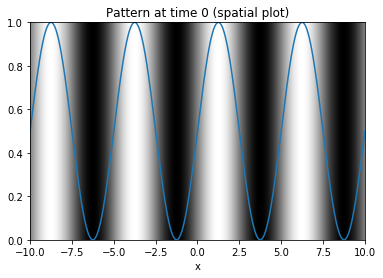

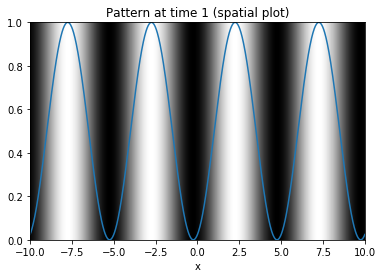

In [2]:
x = np.linspace(-10,10,1000)


y = f(x,0,1,wavelength0)
yarr = np.vstack((y,))
plt.imshow(yarr, extent=(min(x),max(x), 0,1), aspect='auto', cmap='gray')
plt.plot(x, y)  
plt.xlim([-10, 10])
plt.ylim([0, 1])  
plt.title('Pattern at time 0 (spatial plot)')
plt.xlabel('x')
plt.show() 

y = f(x,1,1,wavelength0)
yarr = np.vstack((y,))
plt.imshow(yarr, extent=(min(x),max(x), 0,1), aspect='auto', cmap='gray')
plt.plot(x, y)  
plt.xlim([-10, 10])
plt.ylim([0, 1])  
plt.title('Pattern at time 1 (spatial plot)')
plt.xlabel('x')
plt.show() 

A detector at $x_1 = 0$ will see a wave of the form 
$y_1(0,t) = y_1(t)$

A detector at $x_2 = \Delta x$ will see a wave of the form 
$y_2(\Delta x, t) = y_2(t)$

In [3]:
def y1(t,v,wavelength):
    return f(0,t,v,wavelength)

def y2(t,v,wavelength):
    return f(dx,t,v,wavelength)

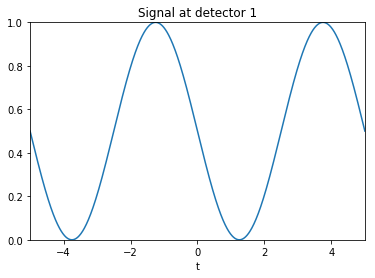

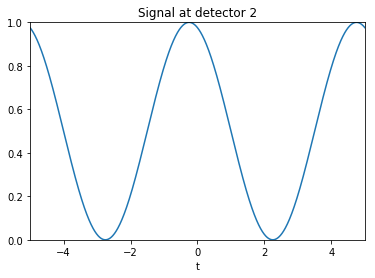

In [4]:
t = np.linspace(-5,5,1000)

y = y1(t,v0,wavelength0)
plt.plot(t, y)  
plt.xlim([-5, 5])  
plt.ylim([0, 1])  
plt.title('Signal at detector 1')
plt.xlabel('t')
plt.show()

y = y2(t,v0,wavelength0)
plt.plot(t, y)  
plt.xlim([-5, 5])  
plt.ylim([0, 1])  
plt.title('Signal at detector 2')
plt.xlabel('t')
plt.show() 

The left channel of the RH detector computes $y_1(t-\Delta t) \cdot y_2(t)$

The right channel of the RH detector computes $y_1(t) \cdot y_2(t-\Delta t)$

The RH detector computes the difference of the left and right channels
$y_1(t-\Delta t) \cdot y_2(t) - y_1(t) \cdot y_2(t-\Delta t)$

In [5]:
def left(t, v, sigma):
    return y1(t-dt,v,sigma) * y2(t,v,sigma)

def right(t, v, sigma):
    return y1(t,v,sigma) * y2(t-dt,v,sigma)


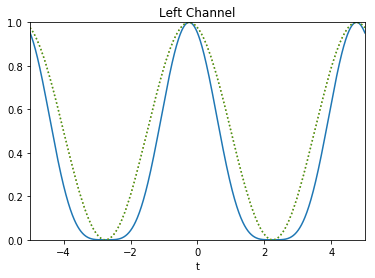

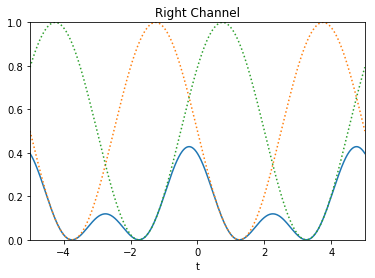

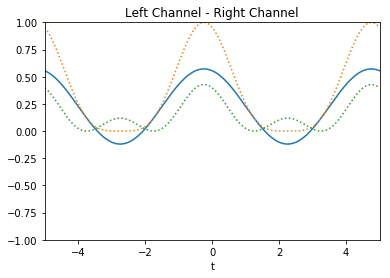

In [6]:
t = np.linspace(-5,5,1000)

plt.plot(t, left(t, v0, wavelength0))  
plt.plot(t, y1(t-dt, v0, wavelength0), linestyle=':')
plt.plot(t, y2(t, v0, wavelength0), linestyle=':')  
plt.xlim([-5, 5])  
plt.ylim([0, 1])
plt.xlabel('t')
plt.title('Left Channel')  
plt.show() 


plt.plot(t, right(t, v0, wavelength0))  
plt.plot(t, y1(t, v0, wavelength0), linestyle=':')  
plt.plot(t, y2(t-dt, v0, wavelength0), linestyle=':')
plt.xlim([-5, 5])  
plt.ylim([0, 1])  
plt.xlabel('t')
plt.title('Right Channel')  
plt.show()

plt.plot(t, left(t, v0, wavelength0) - right(t, v0, wavelength0))
plt.plot(t, left(t, v0, wavelength0), linestyle=':')
plt.plot(t, right(t, v0, wavelength0), linestyle=':')  
plt.xlim([-5, 5])  
plt.ylim([-1, 1])  
plt.xlabel('t')
plt.title('Left Channel - Right Channel')  
plt.show() 

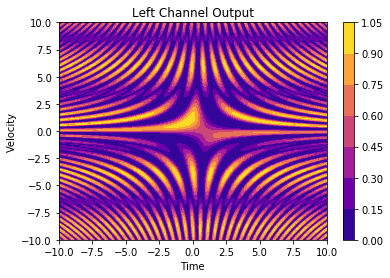

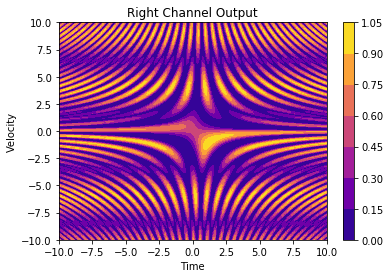

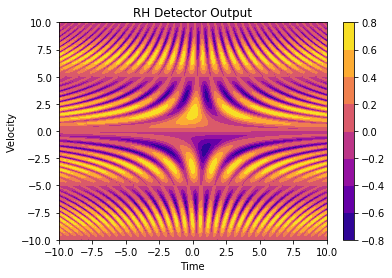

In [7]:
# Implementation of matplotlib function 
import matplotlib.pyplot as plt 
import numpy as np 
  
t = np.linspace(-10, 10, 200)
v = np.linspace(-10, 10, 200) 
#sigma = np.linspace(0.1, 5, 100) 

fig, ax = plt.subplots(1, 1) 
output_left = [[left(t0, v0, wavelength0) for t0 in t] for v0 in v]
plt.contourf(t, v, output_left, cmap='plasma') 
ax.set_title('Left Channel Output') 
ax.set_xlabel('Time') 
ax.set_ylabel('Velocity') 
plt.colorbar()
plt.show() 


fig, ax = plt.subplots(1, 1) 
output_right = [[right(t0, v0, wavelength0) for t0 in t] for v0 in v]
plt.contourf(t, v, output_right, cmap='plasma') 
ax.set_title('Right Channel Output') 
ax.set_xlabel('Time') 
ax.set_ylabel('Velocity') 
plt.colorbar()
plt.show() 


fig, ax = plt.subplots(1, 1) 
output = np.subtract(output_left,output_right)
plt.contourf(t, v, output, cmap='plasma') 
ax.set_title('RH Detector Output') 
ax.set_xlabel('Time') 
ax.set_ylabel('Velocity') 
plt.colorbar()
  
plt.show() 

In [11]:
# Implementation of matplotlib function 
import matplotlib.pyplot as plt 
import numpy as np 
from matplotlib import animation, rc
from IPython.display import HTML
  
v = np.linspace(-10, 10, 200) 
wavelength = np.linspace(0, 10, 200) 

fig, ax = plt.subplots(1, 1)
ax.set_xlim((min(v), max(v)))
ax.set_ylim((min(wavelength), max(wavelength)))
ax.set_title('Left Channel Output') 
ax.set_xlabel('Velocity') 
ax.set_ylabel('Wavelength') 

def animateLeft(i):
    output_left = [[left(0.05*i, v0, wavelength0) for v0 in v] for wavelength0 in wavelength]
    return plt.contourf(v, wavelength, output_left, cmap='plasma')

anim = animation.FuncAnimation(fig, animateLeft, frames=10)
HTML(anim.to_html5_video())
HTML(anim.to_jshtml())

/Users/aatish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/Users/aatish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sin
  # Remove the CWD from sys.path while we load stuff.
/Users/aatish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [9]:
fig, ax = plt.subplots(1, 1)
ax.set_xlim((min(v), max(v)))
ax.set_ylim((min(wavelength), max(wavelength)))
ax.set_title('Right Channel Output') 
ax.set_xlabel('Velocity') 
ax.set_ylabel('Wavelength') 

def animateRight(i):
    output_right = [[right(0.01*i, v0, wavelength0) for v0 in v] for wavelength0 in wavelength]
    return plt.contourf(v, wavelength, output_right, cmap='plasma')

anim = animation.FuncAnimation(fig, animateRight, frames=10)
HTML(anim.to_html5_video())
HTML(anim.to_jshtml())

/Users/aatish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/Users/aatish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/Users/aatish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sin
  # Remove the CWD from sys.path while we load stuff.


KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.set_xlim((min(v), max(v)))
ax.set_ylim((min(wavelength), max(wavelength)))
ax.set_title('RH Detector Output') 
ax.set_xlabel('Velocity') 
ax.set_ylabel('Wavelength') 

def animateRH(i):
    outputRH = [[left(0.01*i, v0, wavelength0) - right(0.01*i, v0, wavelength0) for v0 in v] for wavelength0 in wavelength]
    return plt.contourf(v, wavelength, outputRH, cmap='plasma')

anim = animation.FuncAnimation(fig, animateRH, frames=10)
HTML(anim.to_html5_video())
HTML(anim.to_jshtml())

**Takeaways**: 
1. In the RH Detector, the optimum velocity (i.e. velocity at which the detector has the greatest response) depends on the width of the pattern.
2. Meanwhile in the Left or Right Channel detector, the optimum velocity would be v = dx/dt and independent of the width of the pattern.
3. The optimum velocity (i.e. velocity causing the peak response for a given width) of the RH detector increases as the width of the pattern increases
4. The perceived velocity (i.e. analog output of detector) of the RH detector decreases as the width of the pattern increases (assuming an RH detector tuned to the velocity)